In [1]:
from google.colab import drive
# connect to drive: if success, a window will pop up to let you click and choose the account.
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ROOT_DIR = "/content/drive/MyDrive/wb_localization_dataset"

In [3]:
#install ultralytics
!pip install ultralytics

- More details about YOLOv8's architecture can be found on the internet
- YOLOv8 có nhiều biến thể: nano, small, medium, big,.... => để triển khai trên các thiết bị có phần cứng khác nhau như camera siêu nhỏ thì chip cũng siêu nhỏ, thì chỉ nên dùng yolov8 nano kiểu vậy. Còn đâu có cái GPU to, phần cứng tính toán to hơn có thể dùng yolov8 big => các phiên bản YOLO kiến trúc cơ bản giống nhau nhưng có thể khác nhau một vài chi tiết nào đó => ai đam mê thì lên mạng đọc
- Trong paper, của thầy thì thầy thử nghiệm các phiên bản khác nhau của YOLOv8 với bộ siêu tham số (hyperparameters) giống nhau như dưới:
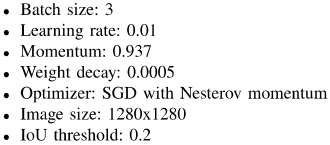

- Kết quả của thầy là YOLOv5x xịn nhất nhưng tốn thời gian nhất vì nó to nhất, nên t đã train theo model có kết quả xịn thứ 2 là YOLOv5m
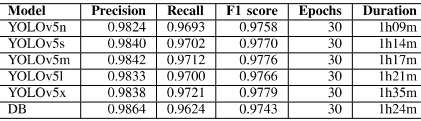

- Bọn m thích train gì thì train, thử nghiệm với bộ siêu tham số nào cũng được, thử YOLOv5n hay YOLOv5s nào cũng được miễn là khác để chứng tỏ với thầy là bọn em có thử nhiều bộ khác nhau - tối nay t đang bận chưa chia được nên bọn m có thể làm cái khác trước, trưa mai 1h chiều t sẽ post lên là ai thử với cái gì sau.

In [4]:
import os

from ultralytics import YOLO

# if train from scratch, do like this below => it can be understood as initializing the model with parameters
# yolov8 cũng có các họ nano - medium - small - .... => phía dưới load yolov8m
model = YOLO("/content/drive/MyDrive/wb_localization_dataset/Yolov5m_augment.pt")
#nếu load model đã pretrain => t đã đổi tên model trưa nay t show cho bọn m
#model = YOLO("/content/drive/MyDrive/wb_localization_dataset/best_YOLOv8_30_4_2024_v2_Ha.pt")

- Tài liệu: ultralytics -> https://docs.ultralytics.com/modes/train/
- Train thì để đó đi làm việc khác không mất kết nối mạng là được - nhưng nếu chạy xong cell này mà m quên k vào lại notebook này quá 30ph hay 45ph gì đó thì nó sẽ tự động runtime disconnected và toang => đi làm việc khác nhưng vẫn phải để ý
- Lúc nó chạy (XIN NHẮC LẠI: chỉ lúc nó chạy thì nó sẽ có folder "runs" => bọn m click vào biểu tượng thứ 4 dưới cùng để xem folder đó
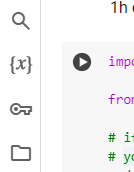

- Lưu file runs đó theo hướng dẫn của Lâm trong nhóm hoặc tải bằng tay như t trưa nay tất cả các file trong này: runs thì sẽ có train hoặc val => m k tải thì sau này mở lại notebook này nó sẽ mất dù m đã train rồi

In [5]:
# bắt đầu train thì chạy cell này => truyền các siêu tham số phải đúng thứ tự => thứ tự như nào đọc doc của ultralytics
results = model.train(data = os.path.join (ROOT_DIR, "colab_config.yaml"), epochs = 100,
            batch = 16,
            pretrained = True,
            imgsz = 640,
            optimizer = 'AdamW',
            lr0 = 0.01,
            momentum = 0.937, weight_decay = 0.0005)

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/wb_localization_dataset/Yolov5m_augment.pt, data=/content/drive/MyDrive/wb_localization_dataset/colab_config.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

100%|██████████| 6.23M/6.23M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/labels/train.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.1G      0.938     0.4604      0.833       2338        640: 100%|██████████| 5/5 [00:14<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.04s/it]


                   all         10       1956      0.902      0.952      0.964      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.9G      1.048     0.5222     0.8548       1563        640: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

                   all         10       1956      0.987      0.977      0.989      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.2G     0.9586     0.4647     0.8351       2134        640: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         10       1956      0.588      0.153      0.227      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.8G     0.8546     0.4417     0.8274       1440        640: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         10       1956      0.328     0.0603     0.0718     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.85G      0.948     0.4305     0.8281       2401        640: 100%|██████████| 5/5 [00:10<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         10       1956      0.623      0.295      0.354      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        14G     0.8959     0.4358     0.8346       2087        640: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         10       1956      0.382      0.309      0.295      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        12G     0.8976     0.4346     0.8366       1691        640: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.05s/it]

                   all         10       1956     0.0986      0.146     0.0668     0.0427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.37G     0.8664     0.4282     0.8262       1281        640: 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         10       1956     0.0683     0.0961     0.0387     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.61G     0.9567     0.4547     0.8306       2574        640: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         10       1956      0.178       0.24      0.135     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      12.5G     0.9397     0.4275     0.8208       2612        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10       1956      0.754      0.556      0.667      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.3G     0.8192     0.4223     0.8236       1725        640: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10       1956      0.883      0.789       0.88      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        12G     0.8674     0.4169     0.8204       1954        640: 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         10       1956      0.928      0.729      0.861       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.5G     0.8725     0.4306     0.8338       1194        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10       1956      0.963      0.954      0.984      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.1G     0.8282     0.4085     0.8167       1255        640: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         10       1956      0.972      0.966      0.988      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.8G     0.8538     0.4112     0.8229       2471        640: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10       1956      0.943      0.766      0.871      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.1G     0.8711     0.4286     0.8202       2617        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10       1956      0.691        0.2      0.265      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100        10G     0.8209     0.4181     0.8121       1512        640: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10       1956       0.15       0.17     0.0773     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        11G     0.8457     0.4128     0.8189       1372        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10       1956      0.203      0.172        0.1     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.24G     0.8291     0.4165     0.8222       1415        640: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10       1956       0.14       0.14     0.0736     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      13.5G     0.9934     0.4383     0.8354       2294        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10       1956       0.14       0.14     0.0736     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.7G     0.8745     0.4296     0.8196       1274        640: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         10       1956       0.14       0.14     0.0736     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.1G     0.9747     0.4505     0.8284       1754        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         10       1956      0.615      0.745      0.524      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      13.4G     0.9002     0.4318     0.8224       2041        640: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         10       1956      0.988      0.985      0.994      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.2G     0.9412     0.4406     0.8305       1717        640: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10       1956       0.97       0.89      0.931       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.8G     0.8884     0.4251     0.8245       1734        640: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10       1956      0.906      0.721      0.762      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.4G     0.8788     0.4097     0.8184       2353        640: 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         10       1956      0.867      0.649      0.684      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        13G     0.9054       0.42     0.8309       1430        640: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         10       1956      0.902      0.531      0.621      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        11G     0.8804     0.4226     0.8173       1827        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10       1956    0.00259    0.00204    0.00129   0.000225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      12.7G     0.9281     0.4326     0.8229       1738        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         10       1956    0.00259    0.00204    0.00129   0.000225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.8G      0.864     0.4145     0.8274       1318        640: 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         10       1956      0.141      0.127     0.0636     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.7G     0.8275      0.402     0.8244       2068        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10       1956      0.858      0.552      0.737      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      12.1G     0.8499     0.4146     0.8161       1941        640: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10       1956      0.887      0.696      0.812      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.9G     0.7717     0.3865     0.8036       2267        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         10       1956      0.771      0.319      0.454      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.4G     0.8326      0.381     0.8183       3225        640: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         10       1956      0.965      0.203      0.373      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.2G     0.8035     0.3836     0.8185       1680        640: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         10       1956       0.83     0.0649      0.451      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.81G     0.7898      0.382      0.817       1422        640: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         10       1956          1    0.00409      0.502      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.8G     0.7757     0.3778     0.8195       1011        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         10       1956          1     0.0102      0.505      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.5G     0.7548     0.3673     0.8086       2299        640: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         10       1956      0.856     0.0879      0.477      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.3G     0.7282      0.361     0.7975       2050        640: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         10       1956      0.986      0.532      0.702       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.1G     0.7248     0.3598     0.8073       1782        640: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10       1956      0.987      0.981      0.994      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.4G      0.722     0.3604       0.81       1154        640: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         10       1956      0.984      0.977       0.99      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.4G     0.7169     0.3511     0.8006       2254        640: 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10       1956      0.981      0.976      0.992      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        12G     0.7246     0.3555     0.8047       2348        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10       1956      0.981       0.99      0.994      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.4G     0.7073     0.3534     0.8033       1851        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10       1956      0.983      0.983      0.994      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.3G     0.7443     0.3635     0.8076       1484        640: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10       1956      0.979      0.986      0.994      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.58G     0.7055     0.3542     0.8033       2408        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         10       1956      0.987      0.984      0.994       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.3G     0.7103     0.3526     0.8035       1858        640: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         10       1956      0.982      0.985      0.994      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.47G     0.6896     0.3437     0.7997       2012        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10       1956      0.987      0.989      0.994      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.5G       0.68     0.3383     0.8025       1697        640: 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         10       1956      0.989      0.988      0.994      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.4G     0.6813     0.3411     0.7984       2182        640: 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         10       1956      0.989      0.989      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      12.6G     0.7072     0.3457     0.8006       2311        640: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10       1956      0.989       0.99      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.7G      0.664     0.3431     0.8005       1317        640: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10       1956      0.976       0.99      0.994      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      12.4G     0.7001     0.3424     0.8031       2716        640: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         10       1956      0.984      0.988      0.994      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.5G     0.6788     0.3315     0.8044       2578        640: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10       1956      0.988      0.992      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.3G     0.6631     0.3322     0.7971       2286        640: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10       1956      0.992       0.99      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.2G     0.6448     0.3256     0.7992       1617        640: 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         10       1956      0.993      0.991      0.995      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.55G     0.6326     0.3291     0.7984       1892        640: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         10       1956      0.992      0.992      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.2G     0.6331      0.327     0.8027       1069        640: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         10       1956      0.993      0.991      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      13.4G     0.6603     0.3394     0.8009       2143        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10       1956      0.993       0.99      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      12.3G     0.6518     0.3318     0.8032       1630        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         10       1956      0.988      0.991      0.994       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.9G     0.6273     0.3257     0.7982       1268        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         10       1956      0.989      0.993      0.994      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.7G     0.6674     0.3341     0.7916       2568        640: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         10       1956       0.99      0.992      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100        12G     0.6605      0.324        0.8       2322        640: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         10       1956       0.99      0.991      0.994      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100        11G     0.6661     0.3259     0.7985       2653        640: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         10       1956      0.991      0.992      0.994      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.6G     0.6642     0.3314     0.8002       1552        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         10       1956      0.993      0.988      0.994      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.4G      0.701      0.336     0.8048       2141        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         10       1956      0.992      0.986      0.994      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      13.5G     0.6502     0.3297     0.7962       1725        640: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         10       1956      0.992      0.984      0.993       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.9G     0.6535     0.3301     0.7991       2123        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10       1956      0.992      0.983      0.994      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.3G      0.639     0.3243     0.7994       1789        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         10       1956      0.994      0.989      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.6G     0.6616     0.3237     0.7958       2611        640: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         10       1956      0.995      0.987      0.994      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.49G     0.6554     0.3346     0.8087       1684        640: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         10       1956      0.994      0.987      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.6G     0.6391     0.3177     0.7937       1589        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         10       1956      0.994      0.989      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.8G     0.6332     0.3168     0.8005       1858        640: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10       1956      0.993      0.991      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.7G     0.6379     0.3149     0.7989       1790        640: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         10       1956      0.992       0.99      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.9G     0.6787     0.3289     0.7967       2236        640: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10       1956      0.992       0.99      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      13.6G     0.6477     0.3258     0.8029       1398        640: 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10       1956      0.992       0.99      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      14.5G     0.6601     0.3237     0.7956       1912        640: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         10       1956      0.993       0.99      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.2G     0.6685     0.3281     0.7915       1566        640: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10       1956      0.993      0.991      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.7G     0.6181     0.3233     0.7956       1483        640: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         10       1956      0.993       0.99      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.5G     0.6386     0.3252      0.802       1570        640: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         10       1956      0.993      0.991      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.4G     0.6341     0.3218     0.7982       1350        640: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         10       1956      0.993      0.991      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.5G     0.6621     0.3336       0.79       1597        640: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         10       1956      0.993      0.991      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.77G      0.609      0.321     0.7947       1555        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         10       1956      0.993      0.991      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.57G     0.6251     0.3238     0.7935       2126        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10       1956      0.993      0.991      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      12.1G     0.6051     0.3117      0.793       1994        640: 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10       1956      0.993      0.992      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      12.9G     0.6456     0.3232     0.8013       2702        640: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         10       1956      0.993      0.989      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.6G     0.6353     0.3196     0.8032       1377        640: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         10       1956      0.994       0.99      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      13.2G     0.6696     0.3404     0.8007       1984        640: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         10       1956      0.993      0.991      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      12.1G     0.6113     0.3148     0.7935       2239        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10       1956      0.992       0.99      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      13.1G     0.6368     0.3235     0.7942       1746        640: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         10       1956      0.988      0.989      0.994      0.852


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.98G     0.6347     0.3358     0.8021        888        640: 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all         10       1956      0.988      0.989      0.994      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.54G     0.6137     0.3289     0.7858       1090        640: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.42s/it]

                   all         10       1956      0.989      0.992      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.58G     0.6504     0.3348     0.8003       1080        640: 100%|██████████| 5/5 [00:10<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         10       1956      0.992      0.991      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.88G     0.6148     0.3224     0.7934       1316        640: 100%|██████████| 5/5 [00:06<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.67s/it]

                   all         10       1956      0.993      0.991      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.19G     0.6295     0.3242     0.7886       1457        640: 100%|██████████| 5/5 [00:05<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


                   all         10       1956      0.993       0.99      0.995      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.69G     0.6198     0.3191     0.8002       1207        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         10       1956      0.994       0.99      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.38G     0.6125     0.3128     0.7999       1142        640: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10       1956      0.994       0.99      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.95G     0.6224     0.3131     0.8057       1133        640: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         10       1956      0.994       0.99      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.85G      0.628     0.3189     0.7963       1150        640: 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10       1956      0.994       0.99      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.17G     0.6107     0.3115     0.7955       1266        640: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         10       1956      0.994       0.99      0.995      0.862



100 epochs completed in 0.235 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


                   all         10       1956      0.993       0.99      0.995      0.864
Speed: 0.2ms preprocess, 8.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


- Khi train thì nó có folder trong folder "runs" thì khi val thì nó cũng có folder "val" trong "runs" => nhìn chỉ số mAP50-95 (Chỉ số mình dùng để chấm điểm với các anh chị) là bao nhiêu trong output của cell này
- File colab_config.yaml chỉ như là xml để config khi sử dụng framework ultralytics thôi => bọn m có thể xem vid tutorial 13ph từ phút 44 -> 57 trong vid này: https://www.youtube.com/watch?v=Z-65nqxUdl4&t=4176s

In [6]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [7]:
!scp -r /content/runs /content/drive/MyDrive/wb_localization_dataset/Hung_res_pt

In [8]:
metrics = model.val(data='/content/drive/MyDrive/wb_localization_dataset/colab_config.yaml')

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.10s/it]


                   all         10       1956      0.993       0.99      0.995       0.87
Speed: 0.3ms preprocess, 99.4ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/train2


- Cell dưới check kết quả đã train được với một bức ảnh

In [12]:
model = YOLO("/content/drive/MyDrive/wb_localization_dataset/Hung_res_pt/runs_v5m_augment+ori/detect/train/weights/best.pt")

In [13]:
metrics = model.val(data='/content/drive/MyDrive/wb_localization_dataset/colab_config.yaml')

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/10gHGTbh1XVN3c7_fuOKeFfy6RRNhT1AN/wb_localization_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]


                   all         10       1956      0.993       0.99      0.995       0.87
Speed: 0.3ms preprocess, 25.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val2


<class 'generator'>

0: 640x416 75 nom_chars, 28.5ms
Number of detected objects: 75
Speed: 3.2ms preprocess, 28.5ms inference, 9.1ms postprocess per image at shape (1, 3, 640, 416)


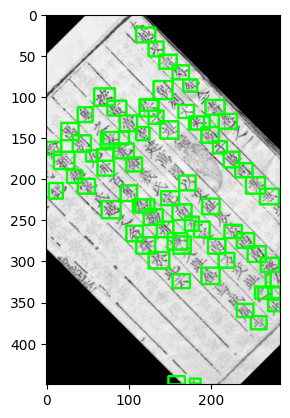

In [14]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/drive/MyDrive/wb_localization_dataset/DVSKTT_ngoai_I_1a.jpg")
def rotate_image(image, angle):
    height = image.shape[0]
    width = image.shape[1]
    center = (width/2, height/2)
    size = (width, height)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    res = cv2.warpAffine(image, rot_mat, size)
    return res

# Rotate the grayscale image
img_gray_rotated = rotate_image(img, 45)
# Make a prediction
results = model.predict(source=img_gray_rotated, save=False, stream=True)
print(type(results))
# Visualize the results
for result in results:
    boxes = result.boxes  # Bounding box predictions
    print(f"Number of detected objects: {len(boxes)}")
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        cv2.rectangle(img_gray_rotated, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

    # Display the image with bounding boxes
    plt.imshow(img_gray_rotated)